In [1]:
import os
import sys
from pathlib import Path

# Get the notebook's directory
notebook_dir = os.getcwd()

# Add the notebook directory and its parent to Python path
sys.path.append(notebook_dir)
sys.path.append(str(Path(notebook_dir).parent))


# Function to add all subdirectories to Python path
def add_subdirs_to_path():
    for root, dirs, files in os.walk(notebook_dir):
        for dir_name in dirs:
            full_path = os.path.join(root, dir_name)
            if full_path not in sys.path:
                sys.path.append(full_path)


# Add all subdirectories
add_subdirs_to_path()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_engineering import engineer_features
from utils.load_data import load_data
from data_cleaning.data_cleaning import clean_data

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [13]:
df = load_data("../data/train.csv")
df = engineer_features(df)
df = clean_data(df)

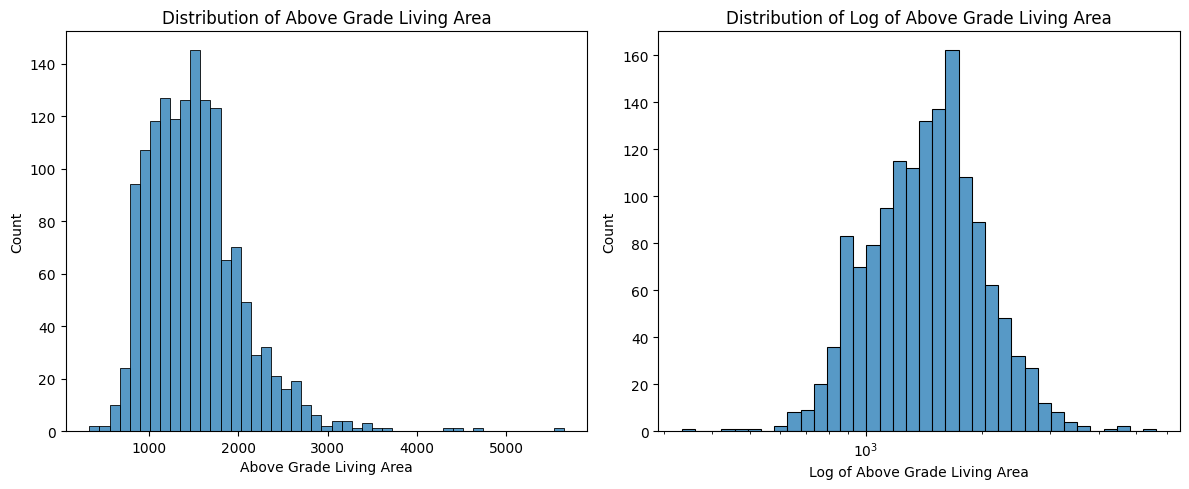

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set(xlabel="Above Grade Living Area")
ax1.set_title("Distribution of Above Grade Living Area")
sns.histplot(data=df, x="GrLivArea", ax=ax1)
# ax1.legend(title="Grouped Quality")

ax2.set(xscale="log", xlabel="Log of Above Grade Living Area")
ax2.set_title("Distribution of Log of Above Grade Living Area")
sns.histplot(data=df, x="GrLivArea", ax=ax2)
# ax2.legend(title="Grouped Condition")
plt.tight_layout()
plt.show()

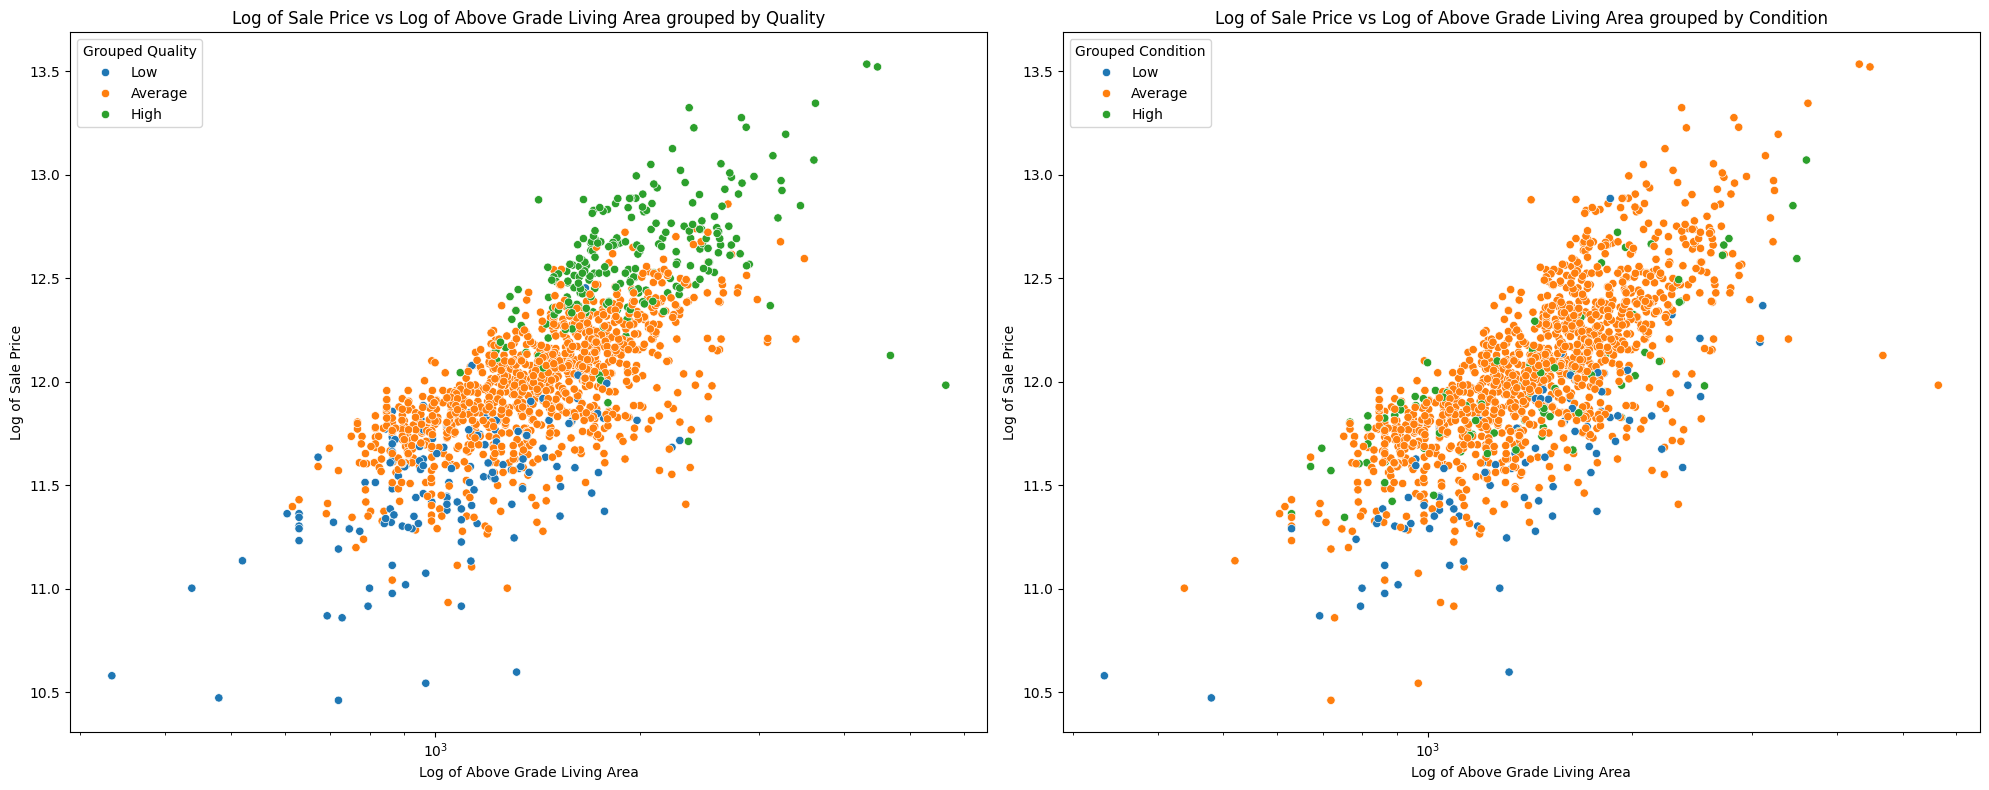

0.7302548511982289


In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set(
    xscale="log", xlabel="Log of Above Grade Living Area", ylabel="Log of Sale Price"
)
ax1.set_title("Log of Sale Price vs Log of Above Grade Living Area grouped by Quality")
sns.scatterplot(data=df, x="GrLivArea", y="log_sale_price", hue="grouped_qual", ax=ax1)
ax1.legend(title="Grouped Quality")

ax2.set(
    xscale="log", xlabel="Log of Above Grade Living Area", ylabel="Log of Sale Price"
)
ax2.set_title(
    "Log of Sale Price vs Log of Above Grade Living Area grouped by Condition"
)
sns.scatterplot(data=df, x="GrLivArea", y="log_sale_price", hue="grouped_cond", ax=ax2)
ax2.legend(title="Grouped Condition")
plt.tight_layout()
plt.show()

print(df["log_sale_price"].corr(np.log(df["GrLivArea"]))) # 0.7302548511982289

ExterQual_grouped
Low         14
Average    906
High       540
Name: count, dtype: int64


BsmtQual_grouped
Low         72
Average    649
High       739
Name: count, dtype: int64


HeatingQC_grouped
Low         50
Average    428
High       982
Name: count, dtype: int64


KitchenQual_grouped
Low         39
Average    735
High       686
Name: count, dtype: int64


GarageQual_grouped
Low         132
Average    1311
High         17
Name: count, dtype: int64


FireplaceQu_grouped
Low        743
Average    313
High       404
Name: count, dtype: int64


PoolQC_grouped
Low        1455
Average       0
High          5
Name: count, dtype: int64




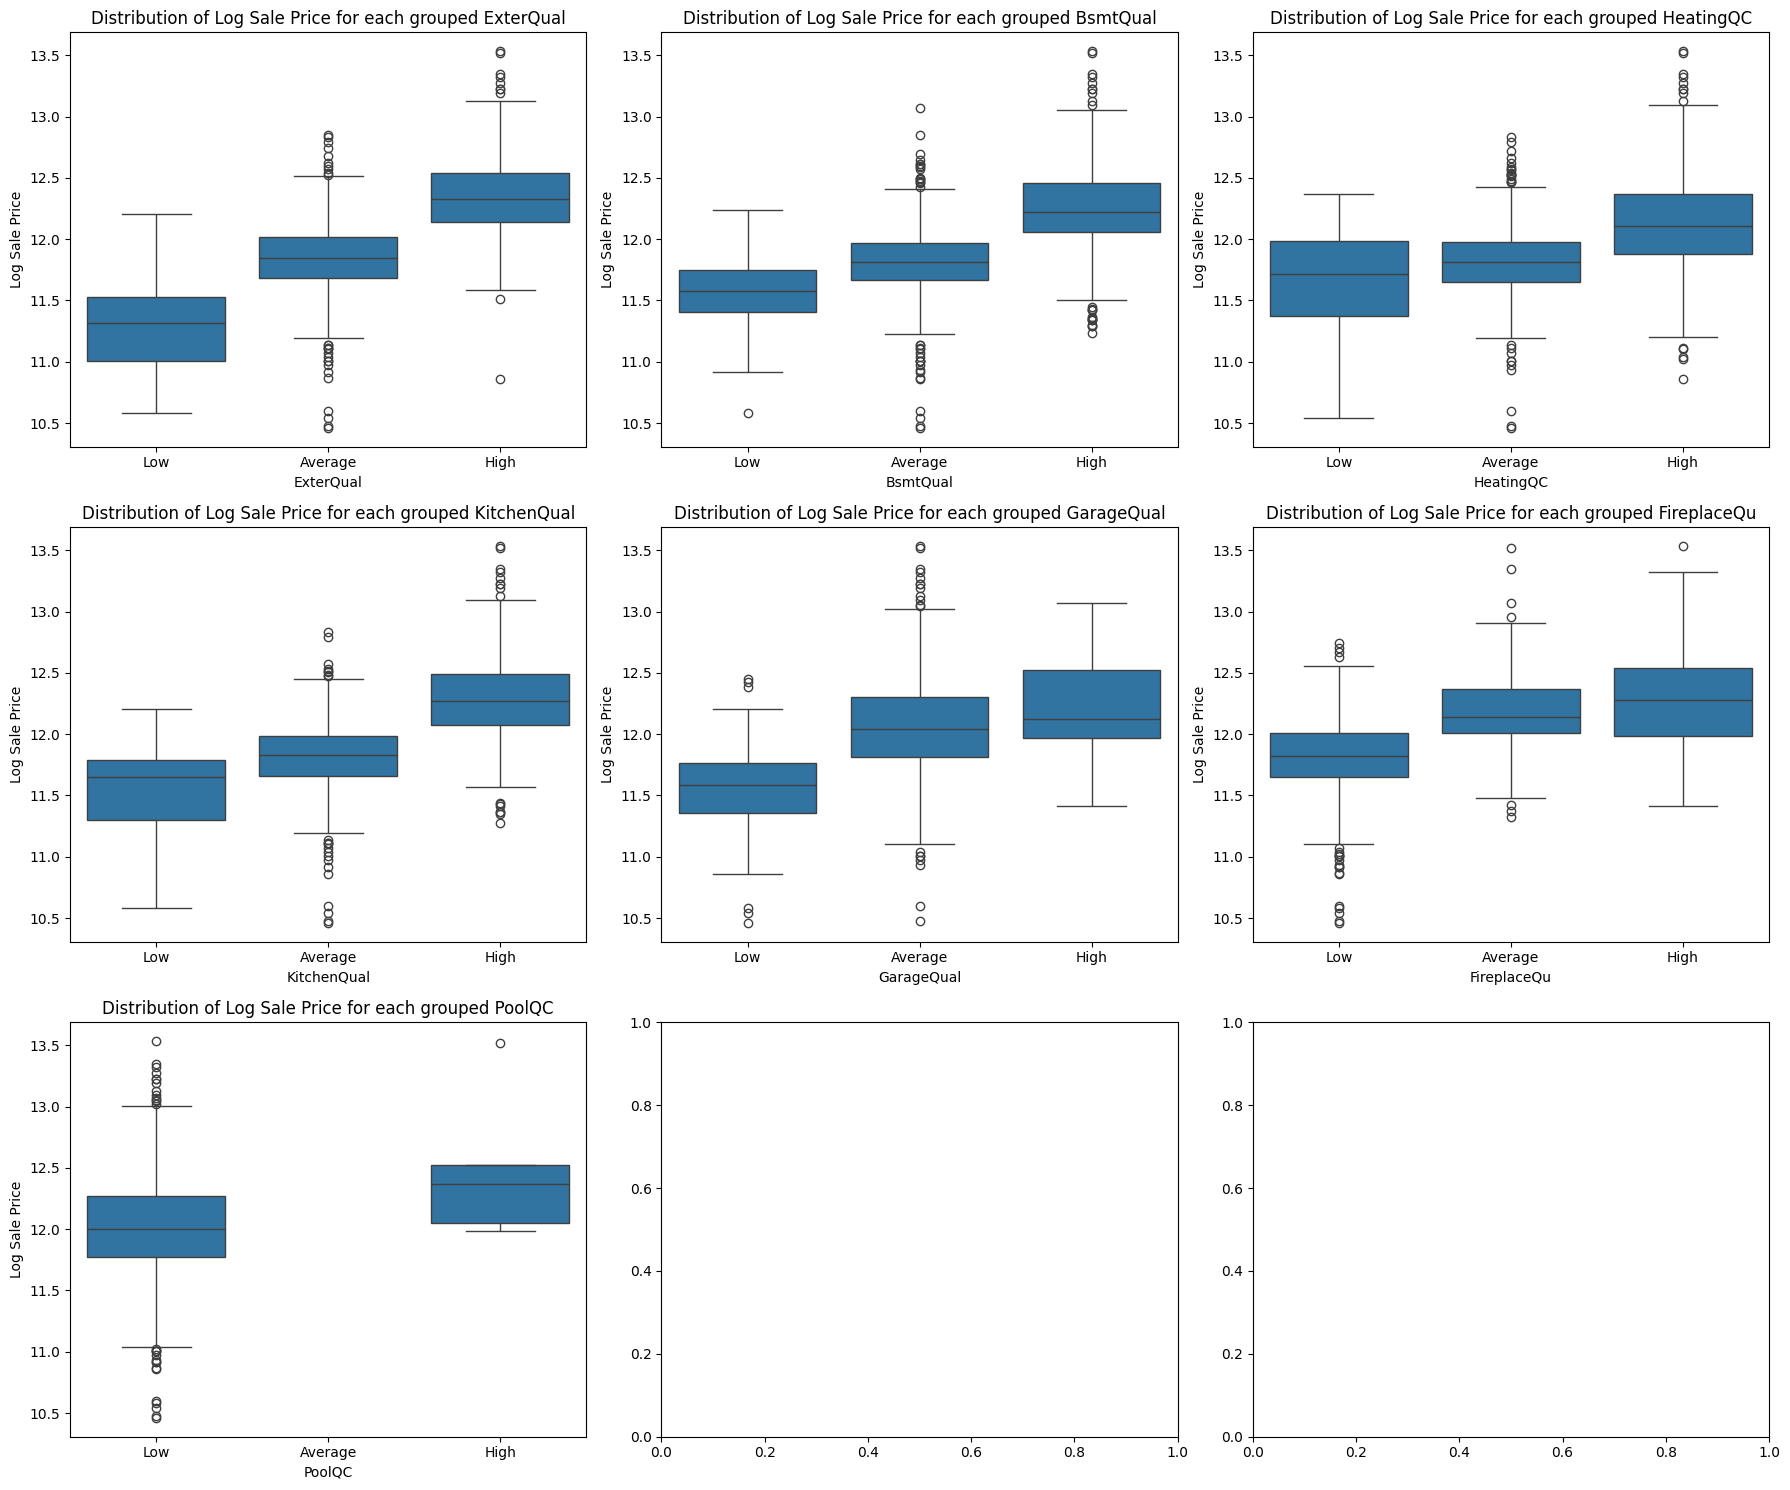

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
qual_vars = [["ExterQual", "BsmtQual", "HeatingQC"], ["KitchenQual", "GarageQual", "FireplaceQu"], ["PoolQC"]]
for i, row in enumerate(qual_vars):
    for j, col in enumerate(row):
        print(df[f"{col}_grouped"].value_counts(sort=False))
        print("\n")
        ax = axes[i][j]
        sns.boxplot(data=df, x=f"{col}_grouped", y="log_sale_price", ax=ax)
        ax.set_title(f"Distribution of Log Sale Price for each grouped {col}")
        ax.set(xlabel=col, ylabel="Log Sale Price")

plt.tight_layout()
plt.show()

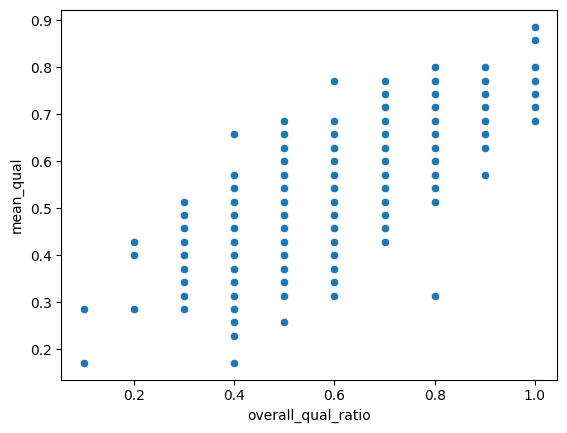

0.7748736419410495
ExterQual_ratio mean root squared difference from overall qualiry ratio: 0.11846622546254466;

BsmtQual_ratio mean root squared difference from overall qualiry ratio: 0.16446259515610065;

KitchenQual_ratio mean root squared difference from overall qualiry ratio: 0.14336943370379876;

GarageQual_ratio mean root squared difference from overall qualiry ratio: 0.17495596314814735;

HeatingQC_ratio mean root squared difference from overall qualiry ratio: 0.2822730631707192;

FireplaceQu_ratio mean root squared difference from overall qualiry ratio: 0.4012736571782472;

PoolQC_ratio mean root squared difference from overall qualiry ratio: 0.6232537248019077;



In [14]:
value_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}

qual_vars = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageQual",
    "HeatingQC",
    "FireplaceQu",
    "PoolQC",
]
for var in qual_vars:
    df[f"{var}_ratio"] = df[var].map(value_map).astype(float) / 5

df["mean_qual"] = df[map(lambda v: v + "_ratio", qual_vars)].mean(axis=1)
df["overall_qual_ratio"] = df["OverallQual"].astype(int) / 10

sns.scatterplot(data=df, x="overall_qual_ratio", y="mean_qual")
plt.show()

print(df["mean_qual"].corr(df["overall_qual_ratio"]))  # 0.7748736419410495

for var in map(lambda v: v + "_ratio", qual_vars):
    rmsd = np.sqrt(((df[var] - df["overall_qual_ratio"]) ** 2).mean())
    print(f"{var} mean root squared difference from overall qualiry ratio: {rmsd};\n")

BsmtExposure
NA     37
No    954
Mn    114
Av    221
Gd    134
Name: count, dtype: int64


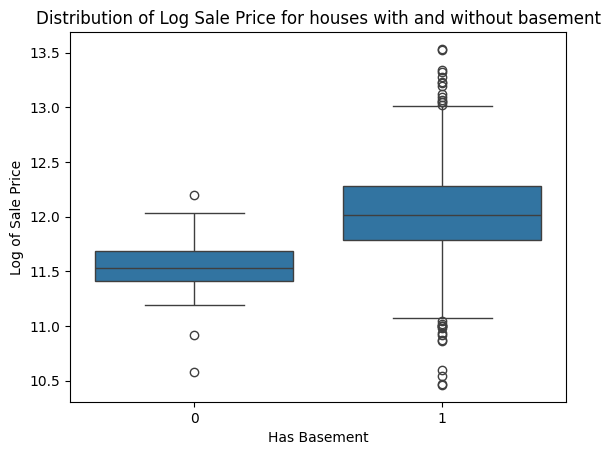

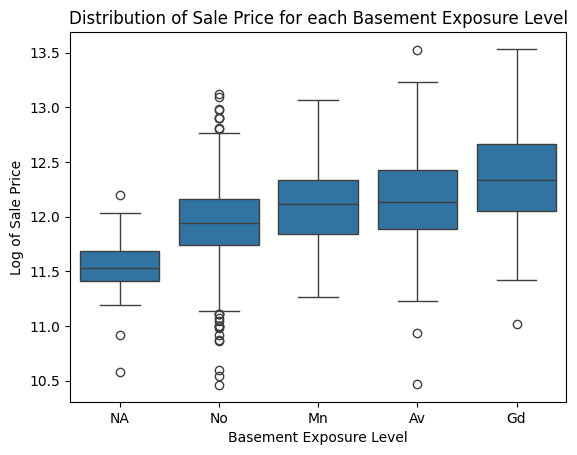

In [65]:
# Basement
print(df["BsmtExposure"].value_counts(sort=False))

sns.boxplot(data = df, x = "has_basement", y = "log_sale_price")
plt.title("Distribution of Log Sale Price for houses with and without basement")
plt.xlabel("Has Basement")
plt.ylabel("Log of Sale Price")
plt.show()

sns.boxplot(data = df, x = "BsmtExposure", y = "log_sale_price")
plt.title("Distribution of Sale Price for each Basement Exposure Level")
plt.xlabel("Basement Exposure Level")
plt.ylabel("Log of Sale Price")
plt.show()


BsmtFinType1
NA      37
Unf    430
LwQ     74
Rec    133
BLQ    148
ALQ    220
GLQ    418
Name: count, dtype: int64


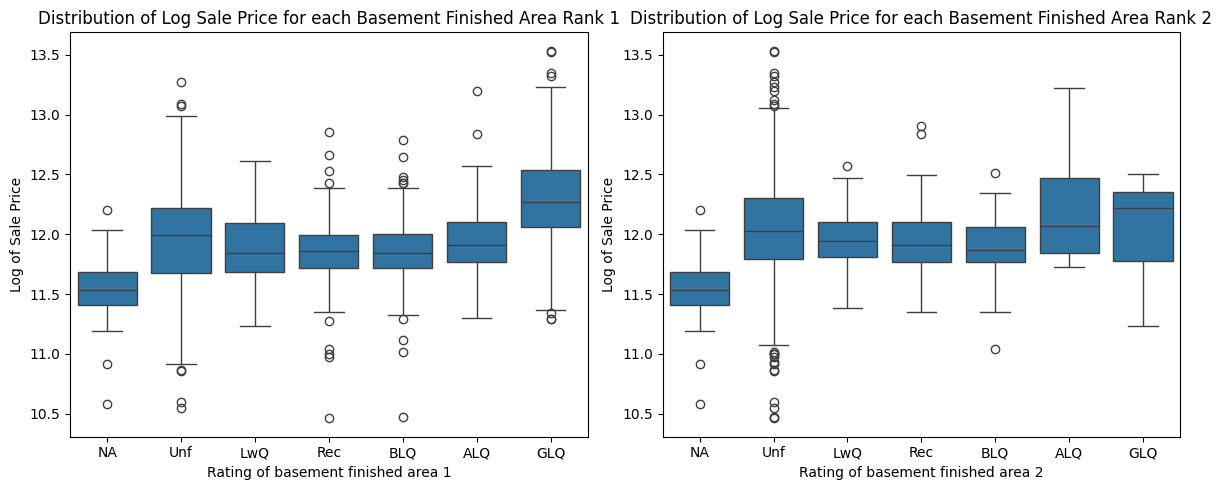

In [72]:
print(df["BsmtFinType1"].value_counts(sort=False))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Distribution of Log Sale Price for each Basement Finished Area Rank 1")
ax1.set(xlabel="Rating of basement finished area 1", ylabel="Log of Sale Price")
sns.boxplot(data = df, x = "BsmtFinType1", y = "log_sale_price", ax = ax1)
ax2.set_title("Distribution of Log Sale Price for each Basement Finished Area Rank 2")
ax2.set(xlabel="Rating of basement finished area 2", ylabel="Log of Sale Price")
sns.boxplot(data = df, x = "BsmtFinType2", y = "log_sale_price", ax = ax2)
plt.tight_layout()
plt.show()

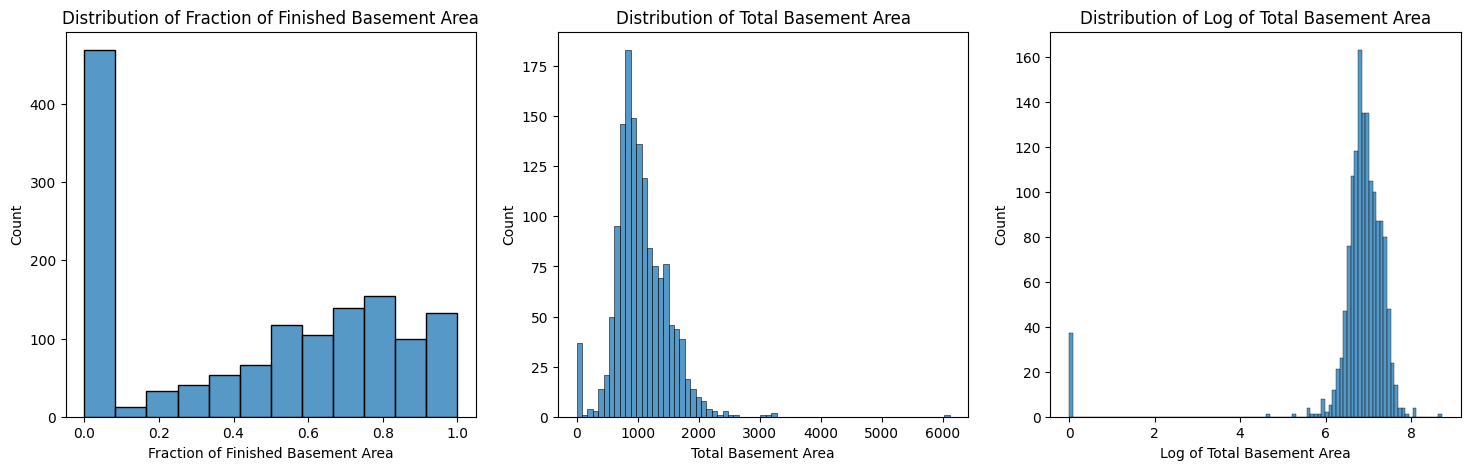

In [73]:
df["finished_bsmt_area_ratio"] = 1 - (df["BsmtUnfSF"] / df["TotalBsmtSF"])
df["log_total_bsmt_sf"] = np.log1p(df["TotalBsmtSF"])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data = df, x = "finished_bsmt_area_ratio", ax=ax1)
ax1.set_title("Distribution of Fraction of Finished Basement Area")
ax1.set(xlabel="Fraction of Finished Basement Area")
sns.histplot(data = df, x = "TotalBsmtSF", ax=ax2)
ax2.set_title("Distribution of Total Basement Area")
ax2.set(xlabel="Total Basement Area")
sns.histplot(data = df, x = "log_total_bsmt_sf", ax=ax3)
ax3.set_title("Distribution of Log of Total Basement Area")
ax3.set(xlabel="Log of Total Basement Area")
plt.show()

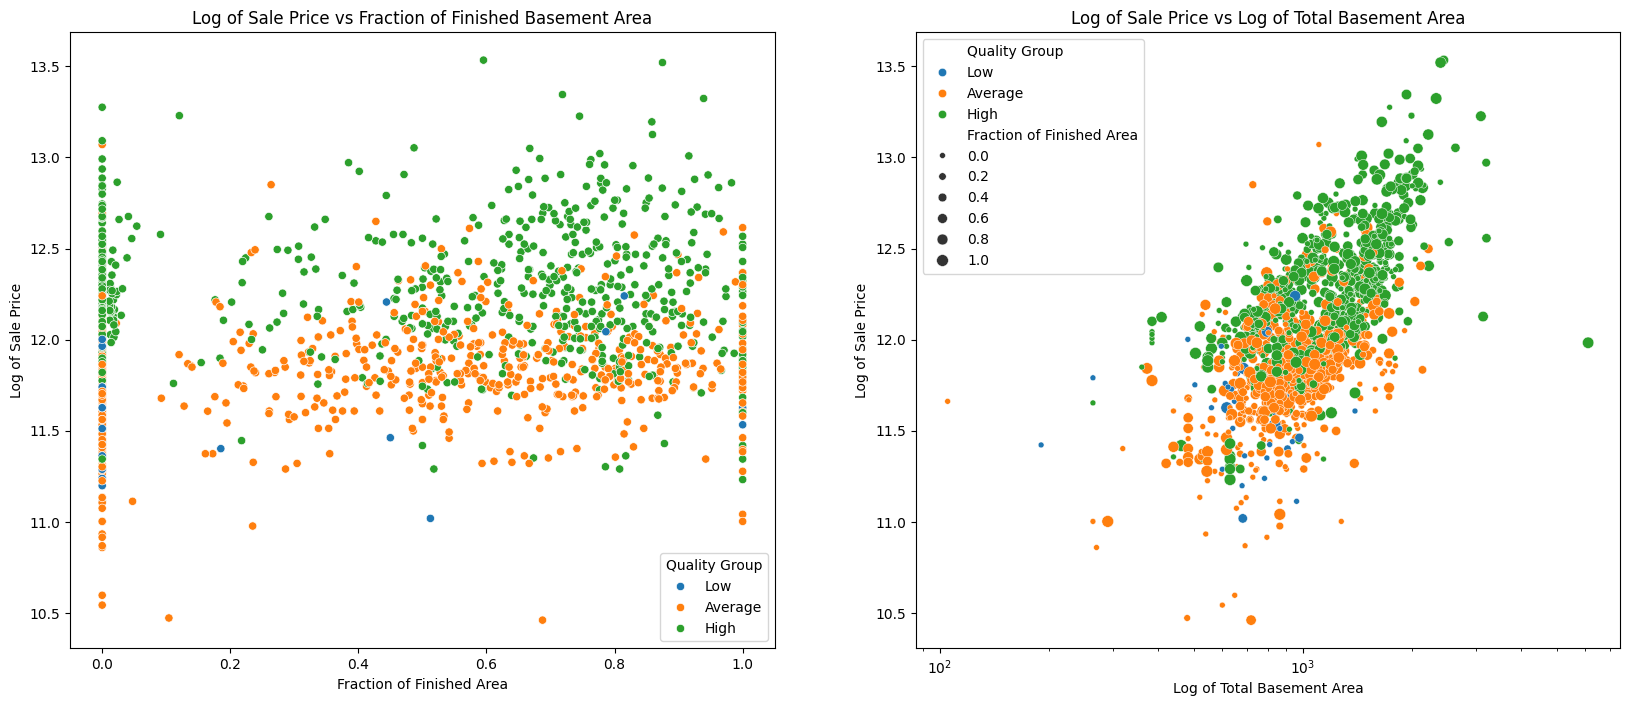

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# First plot
ax1.set_title("Log of Sale Price vs Fraction of Finished Basement Area")
ax1.set(xlabel="Fraction of Finished Area", ylabel="Log of Sale Price")
sns.scatterplot(
    data=df[df["has_basement"] == 1],
    x="finished_bsmt_area_ratio",
    y="log_sale_price",
    hue="BsmtQual_grouped",
    hue_order=["Low", "Average", "High"],
    ax=ax1,
)
ax1.legend(title="Quality Group")

# Second plot
ax2.set_title("Log of Sale Price vs Log of Total Basement Area")
ax2.set(xscale="log", xlabel="Log of Total Basement Area", ylabel="Log of Sale Price")
scatter = sns.scatterplot(
    data=df[df["has_basement"] == 1],
    x="TotalBsmtSF",
    y="log_sale_price",
    hue="BsmtQual_grouped",
    size="finished_bsmt_area_ratio",  # This controls the size of points
    hue_order=["Low", "Average", "High"],
    ax=ax2,
)

# Update the legend title for the size field
handles, labels = scatter.get_legend_handles_labels()
# Find the index of the size legend
size_index = labels.index("finished_bsmt_area_ratio")
qual_index = labels.index("BsmtQual_grouped")
# Replace the label with the new string
labels[size_index] = "Fraction of Finished Area"
labels[qual_index] = "Quality Group"
# Recreate the legend with the updated labels
ax2.legend(handles, labels)

plt.show()